In [1]:
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
from master_function import data_preprocessing, plot_train_test_values
from master_function import calculate_accuracy, model_bias
from sklearn.metrics import mean_squared_error



In [2]:
start_date = '1990-01-01'
end_date = '2023-06-01'

#Fetch S&P 500 price dataset

data = np.array((pdr.get_data_fred('SP500', start = start_date, end = end_date)).dropna())

data = np.diff((data[:,0]))

#Hyperparameters specification

num_lags =100
train_test_split = 0.8
num_neurons_in_hidden_layers = 20
num_epochs = 500
batch_size =16



Epoch 1/500


c:\Users\goeld\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


109/109 ━━━━━━━━━━━━━━━━━━━━ 1s 647us/step - loss: 1516.3606
Epoch 2/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 1113.7831
Epoch 3/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 678us/step - loss: 884.6920
Epoch 4/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 665us/step - loss: 709.9888
Epoch 5/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 727us/step - loss: 644.7855
Epoch 6/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 679us/step - loss: 753.5128
Epoch 7/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 698us/step - loss: 589.1658
Epoch 8/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 676us/step - loss: 569.4341
Epoch 9/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 595.2957
Epoch 10/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 666us/step - loss: 475.5352
Epoch 11/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 509.6897
Epoch 12/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 675us/step - loss: 471.6908
Epoch 13/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 645us/step - loss: 414.4424
Epoch 14/500
109/109 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 395.14

c:\Users\goeld\anaconda3\master_function.py:175: RuntimeWarning: invalid value encountered in divide
  plotting_time_series[0:first, 1] = plotting_time_series[0:first, 1] / 0
c:\Users\goeld\anaconda3\master_function.py:176: RuntimeWarning: invalid value encountered in divide
  plotting_time_series[0:first, 2] = plotting_time_series[0:first, 2] / 0
c:\Users\goeld\anaconda3\master_function.py:177: RuntimeWarning: invalid value encountered in divide
  plotting_time_series[first:, 0] = plotting_time_series[first:, 0] / 0


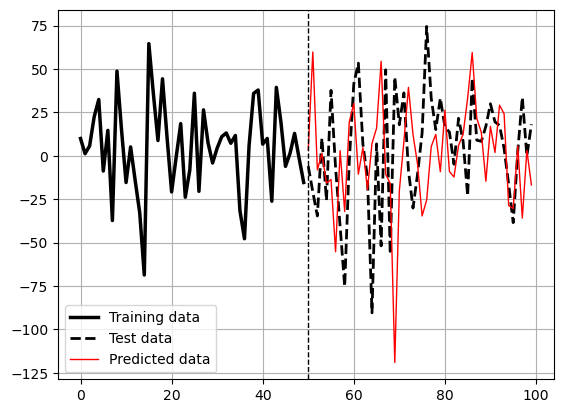

In [7]:
x_train, y_train, x_test, y_test = data_preprocessing(data, num_lags, train_test_split)

model = Sequential()

#First hidden layer with ReLU as activation function
model.add(Dense(num_neurons_in_hidden_layers, input_dim = num_lags, activation= 'relu'))

#Second Hidden Layer
model.add(Dense(num_neurons_in_hidden_layers, activation= 'relu'))

#Output Layer
model.add(Dense(1))

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

#Fitting the model

model.fit(x_train, np.reshape(y_train, (-1,1)), epochs = num_epochs, batch_size= batch_size)

y_predicted_train = np.reshape(model.predict(x_train), (-1, 1))

#Predicting out-of-sample

y_predicted = np.reshape(model.predict(x_test), (-1,1))

plot_train_test_values(100, 50, y_train, y_test, y_predicted)



In [8]:
# performance evaluation

print('---------')
print('Model Accuracy over the Training Dataset =', round(calculate_accuracy(y_predicted_train, y_train), 2), '%')
print('Model Accuracy over the test Dataset =', round(calculate_accuracy(y_predicted, y_test), 2), '%')
print('Root Mean Square Error over Training Dataset=', round(np.sqrt(mean_squared_error(y_predicted_train, y_train)), 10))
print('Root Mean Square error over test Dataset =', round(np.sqrt(mean_squared_error(y_predicted, y_test)), 10) )
print('Correlation In-Sample Predicted /Train =', round(np.corrcoef(np.reshape(y_predicted_train, (-1)), y_train)[0][1], 3))
print('Correlation out-of-sample Predicted/Test =', round(np.corrcoef(np.reshape(y_predicted, (-1)), np.reshape(y_test, (-1)))[0][1], 3))
print('Model Bias =', round(model_bias(y_predicted), 2))
print('---------')

---------
Model Accuracy over the Training Dataset = 91.15 %
Model Accuracy over the test Dataset = 50.0 %
Root Mean Square Error over Training Dataset= 5.7481259364
Root Mean Square error over test Dataset = 80.7402480516
Correlation In-Sample Predicted /Train = 0.983
Correlation out-of-sample Predicted/Test = 0.01
Model Bias = 1.21
---------
